# Importing Data

In [ ]:
pip install farasapy

In [ ]:
pip install flair

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test-dataset.csv")

# **Tokenization**

Les données sources et cibles, maintenant converties en chaînes de caractères, sont ensuite divisées en mots individuels à l'aide de la fonction word_tokenize de NLTK. Cette étape est cruciale pour obtenir une liste de mots à partir de chaque phrase.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize


In [ ]:
source_text = dataset['source'].astype(str)
target_text = dataset['target'].astype(str)

In [ ]:
source_tokens = source_text.apply(word_tokenize)
target_tokens = target_text.apply(word_tokenize)

# **Stemming**

La bibliothèque Farasa est utilisée pour effectuer le stemming, une technique qui réduit chaque mot à sa forme racine. Pour ce faire, une fonction FarasaStemmer est appliquée aux mots obtenus après la tokenisation.

In [ ]:
from farasa.stemmer import FarasaStemmer
farasa_stemmer = FarasaStemmer(interactive=True)

[2023-12-27 22:39:37,113 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


Une fonction apply_stemming est définie pour parcourir chaque liste de mots obtenue après la tokenisation. Cette fonction applique le stemming en utilisant la bibliothèque Farasa pour réduire chaque mot à sa forme racine.

In [ ]:
def apply_stemming(tokens):
    stemmed_tokens = []
    for token in tokens:
        stemmed_token = farasa_stemmer.stem(token)
        stemmed_tokens.append(stemmed_token)
    return stemmed_tokens

In [ ]:
source_tokens = source_tokens.apply(apply_stemming)

In [ ]:
target_tokens = target_tokens.apply(apply_stemming)

In [ ]:
source_tokens

0                                [بسم, الله, رحمن, رحيم]
1                                [بسم, الله, رحمن, رحيم]
2                                [بسم, الله, رحمن, رحيم]
3                                [بسم, الله, رحمن, رحيم]
4                                [بسم, الله, رحمن, رحيم]
                             ...                        
133    [إن, ل, في, أنعام, عبرة, نسق, من, في, طون, من,...
134    [قال, لو, أنتم, ملك, خزانة, رحمة, رب, إذا, لأم...
135    [قال, لو, أنتم, ملك, خزانة, رحمة, رب, إذا, لأم...
136                        [ما, أعجل, عن, قوم, يا, موسى]
137        [قال, إن, قد, فتنة, قوم, من, بعد, أضل, سامري]
Name: source, Length: 138, dtype: object

In [ ]:
target_tokens

0      [قد, جاء, رسول, من, نفس, عزيز, على, ما, عنت, ح...
1      [قال, اركب, في, بسم, الله, مجرى, مرسا, إن, رب,...
2      [ما, ب, من, نعمة, من, الله, ثم, إذا, مس, ضر, إ...
3                                [رحمن, على, عرش, استوى]
4                                   [سبح, اسم, رب, عظيم]
                             ...                        
133                                       [من, شاء, ذكر]
134                                 [إذا, مس, خير, منوع]
135                                          [إلا, مصلي]
136      [إن, هذا, متبر, ما, هم, في, باطل, ما, كان, عمل]
137    [كتاب, ل, في, لوح, من, كل, شيء, موعظة, تفصيل, ...
Name: target, Length: 138, dtype: object

# Removing Stop Words

Le code importe également une liste de mots vides (stopwords) à partir de la bibliothèque NLTK.

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Les fonctions remove_blanks sont appliquées aux listes de mots source_tokens et target_tokens à l'aide de la méthode apply. Cela permet de nettoyer les listes de mots obtenues précédemment en éliminant les mots vides, améliorant ainsi la qualité des données pour une utilisation ultérieure.

In [ ]:
def remove_blanks(tokens):
    return [token for token in tokens if token.strip()]


In [ ]:
source_tokens = source_tokens.apply(remove_blanks)
target_tokens = target_tokens.apply(remove_blanks)

En combinant ces étapes supplémentaires avec la tokenisation, le stemming et la suppression des mots vides, le code effectue un prétraitement complet des données textuelles en arabes.

In [ ]:
source_tokens

0                                [بسم, الله, رحمن, رحيم]
1                                [بسم, الله, رحمن, رحيم]
2                                [بسم, الله, رحمن, رحيم]
3                                [بسم, الله, رحمن, رحيم]
4                                [بسم, الله, رحمن, رحيم]
                             ...                        
133    [إن, ل, في, أنعام, عبرة, نسق, من, في, طون, من,...
134    [قال, لو, أنتم, ملك, خزانة, رحمة, رب, إذا, لأم...
135    [قال, لو, أنتم, ملك, خزانة, رحمة, رب, إذا, لأم...
136                        [ما, أعجل, عن, قوم, يا, موسى]
137        [قال, إن, قد, فتنة, قوم, من, بعد, أضل, سامري]
Name: source, Length: 138, dtype: object

In [ ]:
target_tokens

0      [قد, جاء, رسول, من, نفس, عزيز, على, ما, عنت, ح...
1      [قال, اركب, في, بسم, الله, مجرى, مرسا, إن, رب,...
2      [ما, ب, من, نعمة, من, الله, ثم, إذا, مس, ضر, إ...
3                                [رحمن, على, عرش, استوى]
4                                   [سبح, اسم, رب, عظيم]
                             ...                        
133                                       [من, شاء, ذكر]
134                                 [إذا, مس, خير, منوع]
135                                          [إلا, مصلي]
136      [إن, هذا, متبر, ما, هم, في, باطل, ما, كان, عمل]
137    [كتاب, ل, في, لوح, من, كل, شيء, موعظة, تفصيل, ...
Name: target, Length: 138, dtype: object

# Combined Data

In [ ]:
relevance_degree=dataset["relevance_degree"]

In [ ]:
combined_data = []
for idx in range(len(source_tokens)):
    combined_data.append({
        'source': ' '.join(source_tokens[idx]),
        'target': ' '.join(target_tokens[idx]),
        'relevance_degree': relevance_degree[idx]
    })

In [ ]:
from flair.embeddings import FlairEmbeddings, WordEmbeddings,TransformerDocumentEmbeddings, BytePairEmbeddings, DocumentRNNEmbeddings, DocumentPoolEmbeddings
from flair.data import Sentence
from sklearn.metrics.pairwise import cosine_similarity


# **Embeddings**

Dans cette partie, nous allons utiliser les embeddings disponibles dans Flair WordEmbeddings et FlairEmbeddings.
Pour chaque type d'embedding, à savoir TransformerDocumentEmbeddings, DocumentRNNEmbeddings et DocumentPoolEmbeddings nous allons calculer la similarité cosinus entre la cible et la source. Ensuite, nous allons calculer à la fois la corrélation de Spearman et la corrélation de Pearson pour chaque cas correspondant.

# **1-Word Embedding**

In [ ]:
word_embedding = WordEmbeddings('ar')


2023-12-27 23:16:14,749 https://flair.informatik.hu-berlin.de/resources/embeddings/token/ar-wiki-fasttext-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmp8fjrs0or


100%|██████████| 699M/699M [00:34<00:00, 21.4MB/s]

2023-12-27 23:16:49,557 copying /tmp/tmp8fjrs0or to cache at /root/.flair/embeddings/ar-wiki-fasttext-300d-1M.vectors.npy


2023-12-27 23:16:59,126 removing temp file /tmp/tmp8fjrs0or
2023-12-27 23:17:00,097 https://flair.informatik.hu-berlin.de/resources/embeddings/token/ar-wiki-fasttext-300d-1M not found in cache, downloading to /tmp/tmpzb392hui


100%|██████████| 25.5M/25.5M [00:01<00:00, 13.4MB/s]

2023-12-27 23:17:02,646 copying /tmp/tmpzb392hui to cache at /root/.flair/embeddings/ar-wiki-fasttext-300d-1M


2023-12-27 23:17:02,721 removing temp file /tmp/tmpzb392hui


# **--Document RNN Embeddings--**

In [ ]:
document_embeddings = DocumentRNNEmbeddings([word_embedding])

# Cosine Similarity

In [ ]:
cos_sim_list=[]

for idx, data in enumerate(combined_data):
    source_text = data['source']
    target_text = data['target']

    source_sent = Sentence(source_text)
    target_sent = Sentence(target_text)

    document_embeddings.embed(source_sent)
    document_embeddings.embed(target_sent)

    source_embedding = source_sent.embedding.detach().cpu().numpy().reshape(1, -1)
    target_embedding = target_sent.embedding.detach().cpu().numpy().reshape(1, -1)

    cos_sim = cosine_similarity(source_embedding, target_embedding)[0][0]

    cos_sim_list.append(cos_sim)

    print(f"Cosine Similarity between Source and Target in Row {idx+1}: {cos_sim}")

Cosine Similarity between Source and Target in Row 1: 0.8975616097450256
Cosine Similarity between Source and Target in Row 2: 0.9435722827911377
Cosine Similarity between Source and Target in Row 3: 0.4602947235107422
Cosine Similarity between Source and Target in Row 4: 0.6252079010009766
Cosine Similarity between Source and Target in Row 5: 0.6120266914367676
Cosine Similarity between Source and Target in Row 6: 0.9695874452590942
Cosine Similarity between Source and Target in Row 7: 0.47971686720848083
Cosine Similarity between Source and Target in Row 8: 0.6304130554199219
Cosine Similarity between Source and Target in Row 9: 0.48081648349761963
Cosine Similarity between Source and Target in Row 10: 0.4597611427307129
Cosine Similarity between Source and Target in Row 11: 0.3783896863460541
Cosine Similarity between Source and Target in Row 12: 0.5724459290504456
Cosine Similarity between Source and Target in Row 13: 0.5094338059425354
Cosine Similarity between Source and Target i

# Spearman Correlation

In [ ]:
from scipy.stats import spearmanr

In [ ]:
spearman_corr_rnn_em_word_em, spearman_p_value_rnn_em_word_em = spearmanr(cos_sim_list, relevance_degree)

In [ ]:
spearman_corr_rnn_em_word_em

0.2681354835765459

In [ ]:
spearman_p_value_rnn_em_word_em

0.001474469725018007

# Pearson Correlation

In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearson_corr_rnn_em_word_em, pearson_p_value_rnn_em_word_em = pearsonr(cos_sim_list, relevance_degree)

In [ ]:
pearson_corr_rnn_em_word_em

0.3173468444538321

In [ ]:
pearson_p_value_rnn_em_word_em

0.00014908678778519102

# **--Document Pool Embeddings--**

In [ ]:
document_embeddings = DocumentPoolEmbeddings([word_embedding])

# Cosine Similarity

In [ ]:
cos_sim_list=[]

for idx, data in enumerate(combined_data):
    source_text = data['source']
    target_text = data['target']

    source_sent = Sentence(source_text)
    target_sent = Sentence(target_text)

    document_embeddings.embed(source_sent)
    document_embeddings.embed(target_sent)

    source_embedding = source_sent.embedding.detach().cpu().numpy().reshape(1, -1)
    target_embedding = target_sent.embedding.detach().cpu().numpy().reshape(1, -1)

    cos_sim = cosine_similarity(source_embedding, target_embedding)[0][0]

    cos_sim_list.append(cos_sim)

    print(f"Cosine Similarity between Source and Target in Row {idx+1}: {cos_sim}")

Cosine Similarity between Source and Target in Row 1: 0.6650543212890625
Cosine Similarity between Source and Target in Row 2: 0.8418413996696472
Cosine Similarity between Source and Target in Row 3: 0.5785678029060364
Cosine Similarity between Source and Target in Row 4: 0.6576279997825623
Cosine Similarity between Source and Target in Row 5: 0.587131679058075
Cosine Similarity between Source and Target in Row 6: 0.8117908835411072
Cosine Similarity between Source and Target in Row 7: 0.5267645716667175
Cosine Similarity between Source and Target in Row 8: 0.6614667177200317
Cosine Similarity between Source and Target in Row 9: 0.5264279842376709
Cosine Similarity between Source and Target in Row 10: 0.6599310636520386
Cosine Similarity between Source and Target in Row 11: 0.8091826438903809
Cosine Similarity between Source and Target in Row 12: 0.7799606323242188
Cosine Similarity between Source and Target in Row 13: 0.6397218108177185
Cosine Similarity between Source and Target in R

# Spearman Correlation

In [ ]:
spearman_corr_pool_em_word_em, spearman_p_value_pool_em_word_em = spearmanr(cos_sim_list, relevance_degree)

In [ ]:
spearman_corr_pool_em_word_em

0.476969195022053

In [ ]:
spearman_p_value_pool_em_word_em

3.3334076390800993e-09

# Pearson Correlation

In [ ]:
pearson_corr_pool_em_word_em, pearson_p_value_pool_em_word_em = pearsonr(cos_sim_list, relevance_degree)

In [ ]:
pearson_corr_pool_em_word_em

0.4883402769242291

In [ ]:
pearson_p_value_pool_em_word_em

1.2319483671913438e-09

# **2-Flair Embeddings**

# **--Document RNN Embeddings--**

In [ ]:
word_embedding = FlairEmbeddings('ar-forward')
document_embeddings = DocumentRNNEmbeddings([word_embedding])

2023-12-27 23:27:16,528 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-ar-opus-large-forward-v0.1.pt not found in cache, downloading to /tmp/tmpny82p_ao


100%|██████████| 126M/126M [00:06<00:00, 19.7MB/s]

2023-12-27 23:27:23,761 copying /tmp/tmpny82p_ao to cache at /root/.flair/embeddings/lm-ar-opus-large-forward-v0.1.pt


2023-12-27 23:27:26,681 removing temp file /tmp/tmpny82p_ao


# Cosine Similarity

In [ ]:
cos_sim_list=[]

for idx, data in enumerate(combined_data):
    source_text = data['source']
    target_text = data['target']

    source_sent = Sentence(source_text)
    target_sent = Sentence(target_text)

    document_embeddings.embed(source_sent)
    document_embeddings.embed(target_sent)

    source_embedding = source_sent.embedding.detach().cpu().numpy().reshape(1, -1)
    target_embedding = target_sent.embedding.detach().cpu().numpy().reshape(1, -1)

    cos_sim = cosine_similarity(source_embedding, target_embedding)[0][0]

    cos_sim_list.append(cos_sim)

    print(f"Cosine Similarity between Source and Target in Row {idx+1}: {cos_sim}")

Cosine Similarity between Source and Target in Row 1: 0.5623555779457092
Cosine Similarity between Source and Target in Row 2: 0.5329309701919556
Cosine Similarity between Source and Target in Row 3: 0.33638009428977966
Cosine Similarity between Source and Target in Row 4: 0.4988735318183899
Cosine Similarity between Source and Target in Row 5: 0.5373060703277588
Cosine Similarity between Source and Target in Row 6: 0.7493998408317566
Cosine Similarity between Source and Target in Row 7: 0.32957160472869873
Cosine Similarity between Source and Target in Row 8: 0.5096052885055542
Cosine Similarity between Source and Target in Row 9: 0.5140527486801147
Cosine Similarity between Source and Target in Row 10: 0.4805034101009369
Cosine Similarity between Source and Target in Row 11: 0.5785606503486633
Cosine Similarity between Source and Target in Row 12: 0.6972507238388062
Cosine Similarity between Source and Target in Row 13: 0.5658740997314453
Cosine Similarity between Source and Target i

# Spearman Correlation

In [ ]:
spearman_corr_rnn_em_flair_em, spearman_p_value_rnn_em_flair_em = spearmanr(cos_sim_list, relevance_degree)

In [ ]:
spearman_corr_rnn_em_flair_em

0.38237989412006157

In [ ]:
spearman_p_value_rnn_em_flair_em

3.6883185243644607e-06

# Pearson Correlation

In [ ]:
pearson_corr_rnn_em_flair_em, pearson_p_value_rnn_em_flair_em = pearsonr(cos_sim_list, relevance_degree)

In [ ]:
pearson_corr_rnn_em_flair_em

0.42721622422551175

In [ ]:
pearson_p_value_rnn_em_flair_em

1.7349290208910865e-07

# **--Document Pool Embeddings--**

In [ ]:
document_embeddings = DocumentPoolEmbeddings([word_embedding])

# Cosine Similarity

In [ ]:
cos_sim_list=[]

for idx, data in enumerate(combined_data):
    source_text = data['source']
    target_text = data['target']

    source_sent = Sentence(source_text)
    target_sent = Sentence(target_text)

    document_embeddings.embed(source_sent)
    document_embeddings.embed(target_sent)

    source_embedding = source_sent.embedding.detach().cpu().numpy().reshape(1, -1)
    target_embedding = target_sent.embedding.detach().cpu().numpy().reshape(1, -1)

    cos_sim = cosine_similarity(source_embedding, target_embedding)[0][0]

    cos_sim_list.append(cos_sim)

    print(f"Cosine Similarity between Source and Target in Row {idx+1}: {cos_sim}")

Cosine Similarity between Source and Target in Row 1: 0.5036037564277649
Cosine Similarity between Source and Target in Row 2: 0.5999515056610107
Cosine Similarity between Source and Target in Row 3: 0.3773204982280731
Cosine Similarity between Source and Target in Row 4: 0.575232982635498
Cosine Similarity between Source and Target in Row 5: 0.42066800594329834
Cosine Similarity between Source and Target in Row 6: 0.5184564590454102
Cosine Similarity between Source and Target in Row 7: 0.3423394560813904
Cosine Similarity between Source and Target in Row 8: 0.5880063772201538
Cosine Similarity between Source and Target in Row 9: 0.43363112211227417
Cosine Similarity between Source and Target in Row 10: 0.621039867401123
Cosine Similarity between Source and Target in Row 11: 0.7537760734558105
Cosine Similarity between Source and Target in Row 12: 0.6674314141273499
Cosine Similarity between Source and Target in Row 13: 0.606897234916687
Cosine Similarity between Source and Target in R

# Spearman Correlation

In [ ]:
spearman_corr_pool_em_flair_em, spearman_p_value_pool_em_flair_em = spearmanr(cos_sim_list, relevance_degree)

In [ ]:
spearman_corr_pool_em_flair_em

0.4490224669371124

In [ ]:
spearman_p_value_pool_em_flair_em

3.316135757003764e-08

# Pearson Correlation

In [ ]:
pearson_corr_pool_em_flair_em, pearson_p_value_pool_em_flair_em = pearsonr(cos_sim_list, relevance_degree)

In [ ]:
pearson_corr_pool_em_flair_em

0.4708119279344554

In [ ]:
pearson_p_value_pool_em_flair_em

5.629401675954034e-09

# **--Transformer Document Embeddings--**

In [ ]:
model_name = 'bert-base-multilingual-cased'
document_embeddings = TransformerDocumentEmbeddings(model_name)


# Cosine Similarity

In [ ]:
cos_sim_list = []

for idx, data in enumerate(combined_data):
    source_text = data['source']
    target_text = data['target']

    source_sent = Sentence(source_text)
    target_sent = Sentence(target_text)

    document_embeddings.embed(source_sent)
    document_embeddings.embed(target_sent)

    source_embedding = source_sent.get_embedding().cpu().numpy().reshape(1, -1)
    target_embedding = target_sent.get_embedding().cpu().numpy().reshape(1, -1)

    cos_sim = cosine_similarity(source_embedding, target_embedding)[0][0]

    cos_sim_list.append(cos_sim)

    print(f"Cosine Similarity between Source and Target in Row {idx+1}: {cos_sim}")


Cosine Similarity between Source and Target in Row 1: 0.9280645251274109
Cosine Similarity between Source and Target in Row 2: 0.8906566500663757
Cosine Similarity between Source and Target in Row 3: 0.8991294503211975
Cosine Similarity between Source and Target in Row 4: 0.9230535626411438
Cosine Similarity between Source and Target in Row 5: 0.9098426103591919
Cosine Similarity between Source and Target in Row 6: 0.8601900339126587
Cosine Similarity between Source and Target in Row 7: 0.8749433159828186
Cosine Similarity between Source and Target in Row 8: 0.9100892543792725
Cosine Similarity between Source and Target in Row 9: 0.9104507565498352
Cosine Similarity between Source and Target in Row 10: 0.9123592376708984
Cosine Similarity between Source and Target in Row 11: 0.9813846945762634
Cosine Similarity between Source and Target in Row 12: 0.9699865579605103
Cosine Similarity between Source and Target in Row 13: 0.8879804611206055
Cosine Similarity between Source and Target in 

# Spearman Correlation

In [ ]:
spearman_corr_tde, spearman_p_value_tde = spearmanr(cos_sim_list, relevance_degree)

In [ ]:
spearman_corr_tde

0.34521510977679754

In [ ]:
spearman_p_value_tde

3.373225026753663e-05

# Pearson Correlation

In [ ]:
pearson_corr_tde, pearson_p_value_tde = pearsonr(cos_sim_list, relevance_degree)

In [ ]:
pearson_corr_tde

0.31501892242869345

In [ ]:
pearson_p_value_tde

0.00016771816075431418

# **Visualization of the results**

La visualisation permet de comparer les niveaux de corrélation entre les embeddings et les degrés de pertinence. Des valeurs de corrélation élevées indiqueraient une forte relation entre la similarité de cosinus et la pertinence.

Les graphiques obtenus permettent une comparaison visuelle des performances des différents types d'embeddings en termes de corrélation avec les degrés de pertinence.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
spearman_correlation_values = [
    spearman_corr_rnn_em_word_em, spearman_corr_pool_em_word_em,
    spearman_corr_rnn_em_flair_em, spearman_corr_pool_em_flair_em,
    spearman_corr_tde
]

pearson_correlation_values = [
    pearson_corr_rnn_em_word_em, pearson_corr_pool_em_word_em,
    pearson_corr_rnn_em_flair_em, pearson_corr_pool_em_flair_em,
    pearson_corr_tde
]

embedding_labels = [
    'RNN with WordEmbeddings', 'Pool with WordEmbeddings',
    'RNN with FlairEmbeddings', 'Pool with FlairEmbeddings',
    'TransformerDocumentEmbeddings'
]


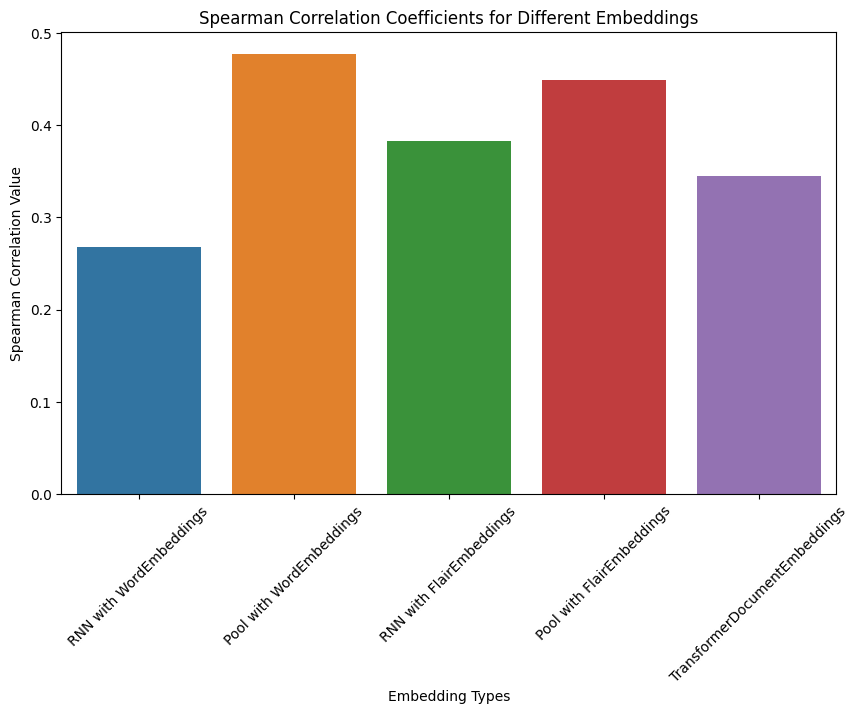

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=embedding_labels, y=spearman_correlation_values)
plt.title('Spearman Correlation Coefficients for Different Embeddings')
plt.ylabel('Spearman Correlation Value')
plt.xlabel('Embedding Types')
plt.xticks(rotation=45)
plt.show()

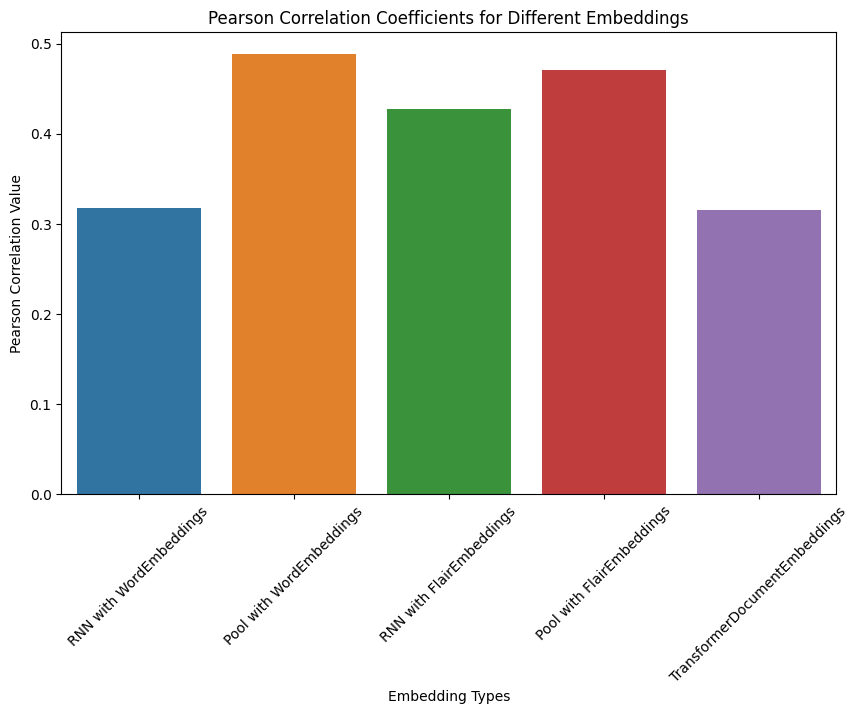

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=embedding_labels, y=pearson_correlation_values)
plt.title('Pearson Correlation Coefficients for Different Embeddings')
plt.ylabel('Pearson Correlation Value')
plt.xlabel('Embedding Types')
plt.xticks(rotation=45)
plt.show()